In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
df = pd.read_csv('Final_Dataset_road_accident_prediction.csv')
df.shape

(173236, 31)

# Train_Test Split

In [3]:
X = df.iloc[:,0:30].values
Y = df.iloc[:,30].values

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.50, random_state = 10)

# Feature_Selection

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile
import matplotlib.pyplot as plt
%matplotlib inline

select = SelectPercentile(percentile=90)

In [5]:
select.fit(x_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


SelectPercentile(percentile=90,
                 score_func=<function f_classif at 0x00000141B0A37400>)

In [6]:
x_train_selected = select.transform(x_train)

In [7]:
print('x_train.shape is : {}'.format(x_train.shape))
print('x_train_selected.shape is : {}'.format(x_train_selected.shape))

x_train.shape is : (86618, 30)
x_train_selected.shape is : (86618, 27)


[ True  True  True False  True  True False  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True]


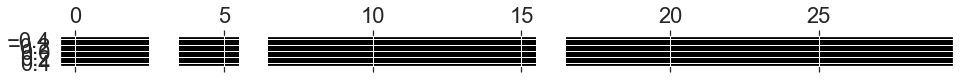

In [25]:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1), cmap='gray_r')

In [8]:
x_test_selected = select.transform(x_test)
x_test_selected.shape

(86618, 27)

## Saved Model Loading

In [23]:
from sklearn.externals import joblib
loaded_model_1 = joblib.load('AT_KNN_50.sav')
loaded_model_2 = joblib.load('AT_GNB_50.sav')
loaded_model_3 = joblib.load('AT_DTAB_50.sav')
loaded_model_4 = joblib.load('AT_DT_50.sav')
loaded_model_5 = joblib.load('AT_RF_50.sav')

## Prediction of all model

In [ ]:
result1 = loaded_model_1.predict(x_test_selected)
result2 = loaded_model_2.predict(x_test_selected)
result3 = loaded_model_3.predict(x_test_selected)
result4 = loaded_model_4.predict(x_test_selected)
result5 = loaded_model_5.predict(x_test_selected)

In [18]:
from sklearn.metrics import accuracy_score

acc=accuracy_score(y_test, result1)
print("knn",acc)

knn 0.530998175898774


In [19]:
from sklearn.metrics import accuracy_score

acc=accuracy_score(y_test, result2)
print("GNB",acc)

GNB 0.9134590962617469


In [24]:
from sklearn.metrics import accuracy_score

acc=accuracy_score(y_test, result5)
print("RF",acc)

RF 1.0


In [21]:
from sklearn.metrics import accuracy_score

acc=accuracy_score(y_test, result3)
print("dtab",acc)

dtab 1.0


In [22]:
from sklearn.metrics import accuracy_score

acc=accuracy_score(y_test, result4)
print("dt",acc)

dt 0.9516728624535316


# KNN Confusion Matrix

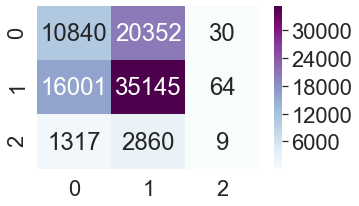

In [16]:
from sklearn.metrics import classification_report, confusion_matrix  
cm = confusion_matrix(y_test,result1)

import seaborn as sn

plt.figure(figsize = (5,3))
sn.set(font_scale=2)
sn.heatmap(cm, annot=True, fmt="d",cmap="BuPu")
plt.show()

# DT Confusion Matrix

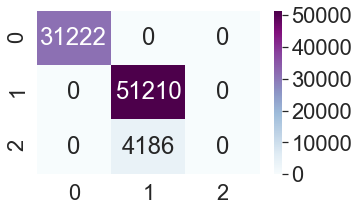

In [15]:
from sklearn.metrics import classification_report, confusion_matrix  
cm = confusion_matrix(y_test,result4)

import seaborn as sn

plt.figure(figsize = (5,3))
sn.set(font_scale=2)
sn.heatmap(cm, annot=True, fmt="d",cmap="BuPu")
plt.show()

# DTAB Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix  
cm = confusion_matrix(y_test,result3)

import seaborn as sn

plt.figure(figsize = (10,7))
sn.set(font_scale=2)
sn.heatmap(cm, annot=True, fmt="d",cmap="BuPu")
plt.show()

# GNB Confusion Matrix

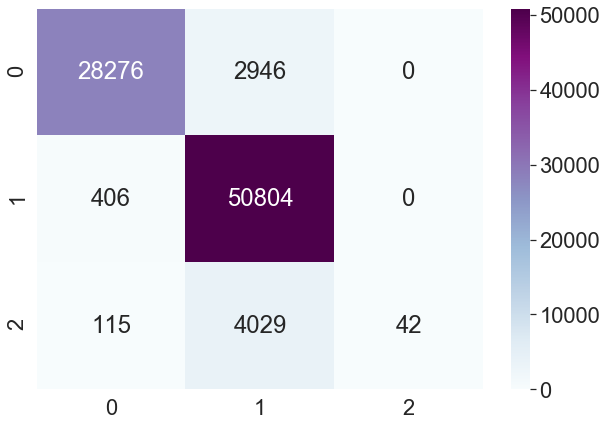

In [14]:
from sklearn.metrics import classification_report, confusion_matrix  
cm = confusion_matrix(y_test,result2)

import seaborn as sn

plt.figure(figsize = (10,7))
sn.set(font_scale=2)
sn.heatmap(cm, annot=True, fmt="d",cmap="BuPu")
plt.show()

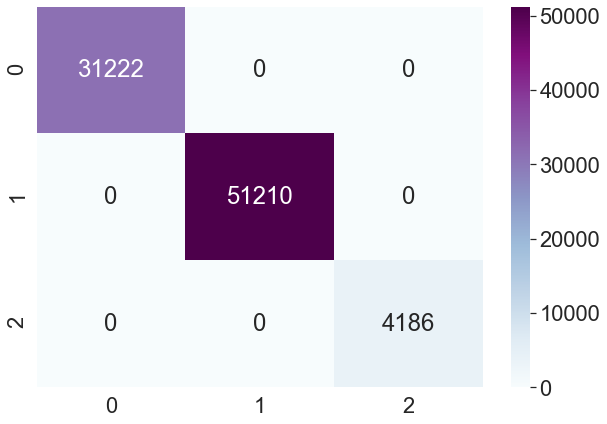

In [26]:
from sklearn.metrics import classification_report, confusion_matrix  
cm = confusion_matrix(y_test,result5)

import seaborn as sn

plt.figure(figsize = (10,7))
sn.set(font_scale=2)
sn.heatmap(cm, annot=True, fmt="d",cmap="BuPu")
plt.show()